## Problem Definition

### Project Overview

* Employee turn-over (also known as "employee churn") is a costly problem for companies. The true cost of replacing an employee can often be quite large. A study by the Center for American Progress found that companies typically pay about one-fifth of an employee’s salary to replace that employee, and the cost can significantly increase if executives or highest-paid employees are to be replaced.



* In other words, the cost of replacing employees for most employers remains significant. This is due to the amount of time spent to interview and find a replacement, sign-on bonuses, and the loss of productivity for several months while the new employee gets accustomed to the new role.



## Problem Statement

* Understanding why and when employees are most likely to leave can lead to actions to improve employee retention as well as possibly planning new hiring in advance. I will be usign a step-by-step systematic approach using a method that could be used for a variety of ML problems. This project would fall under what is commonly known as "HR Anlytics", "People Analytics".

In this study, we will attempt to solve the following problem statement is:

* What is the likelihood of an active employee leaving the company?


* What are the key indicators of an employee leaving the company?


* What policies or strategies can be adopted based on the results to improve employee retention?

Given that we have data on former employees, this is a standard supervised classification problem where the label is a binary variable, 0 (active employee), 1 (former employee). In this study, our target variable Y is the probability of an employee leaving the company.


In this case study, a HR dataset was sourced from IBM HR Analytics Employee Attrition & Performance which contains employee data for 1,470 employees with various information about the employees. I will use this dataset to predict when employees are going to quit by understanding the main drivers of employee churn.

#### Data has various data points on our employees, but you are most interested in whether they’re still with my company or whether they’ve gone to work somewhere else. And you want to understand how this relates to workforce attrition.

*  Education :  1 =  'Below College' ,  2  =  'College' ,  3 =  'Bachelor',  4 =  'Master' , 5 =  'Doctor'


*  Environment Satisfaction :  1 =  'Low',  2 =  'Medium',  3 =  'High',  4 =  'Very High'


*  Job Involvement :  1 =  'Low' ,  2 =  'Medium',  3 =  'High' ,  4 =  'Very High'


*  Job Satisfaction :  1 =  'Low' ,  2 =  'Medium' ,  3 =  'High' ,  4 =  'Very High'


*  Performance Rating :  1 =  'Low' ,  2 =  'Good' ,  3 = 'Excellent' ,  4 =  'Outstanding'


*  Relationship Satisfaction :  1 =  'Low' ,  2 =  'Medium' ,  3 =  'High' ,  4 =  'Very High'


*  WorkLife Balance :  1 =  'Bad' ,  2 =  'Good' ,  3 =  'Better' ,  4 =  'Best'

## Importing LIbraries and Understanding Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Read the Data

In [2]:
Employee_Data = pd.read_csv("employee.csv")

In [3]:
Employee_Data.shape

(1470, 35)

In [4]:
Employee_Data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Lets check the data type

In [5]:
Employee_Data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
Employee_Data.count()

Age                         1470
Attrition                   1470
BusinessTravel              1470
DailyRate                   1470
Department                  1470
DistanceFromHome            1470
Education                   1470
EducationField              1470
EmployeeCount               1470
EmployeeNumber              1470
EnvironmentSatisfaction     1470
Gender                      1470
HourlyRate                  1470
JobInvolvement              1470
JobLevel                    1470
JobRole                     1470
JobSatisfaction             1470
MaritalStatus               1470
MonthlyIncome               1470
MonthlyRate                 1470
NumCompaniesWorked          1470
Over18                      1470
OverTime                    1470
PercentSalaryHike           1470
PerformanceRating           1470
RelationshipSatisfaction    1470
StandardHours               1470
StockOptionLevel            1470
TotalWorkingYears           1470
TrainingTimesLastYear       1470
WorkLifeBa

## Let's check the summary of data

In [7]:
Employee_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
Employee_Data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Total Unique Value

In [9]:
Employee_Data.nunique()

# unique values in the dataset

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

## Missing Value

In [10]:
Employee_Data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

* NO missing value missing values present here.

###  Dropping the unwanted columns 

In [11]:
Employees_Data = Employee_Data.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'], axis = 1)

Employees_Data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


## Visualising Data

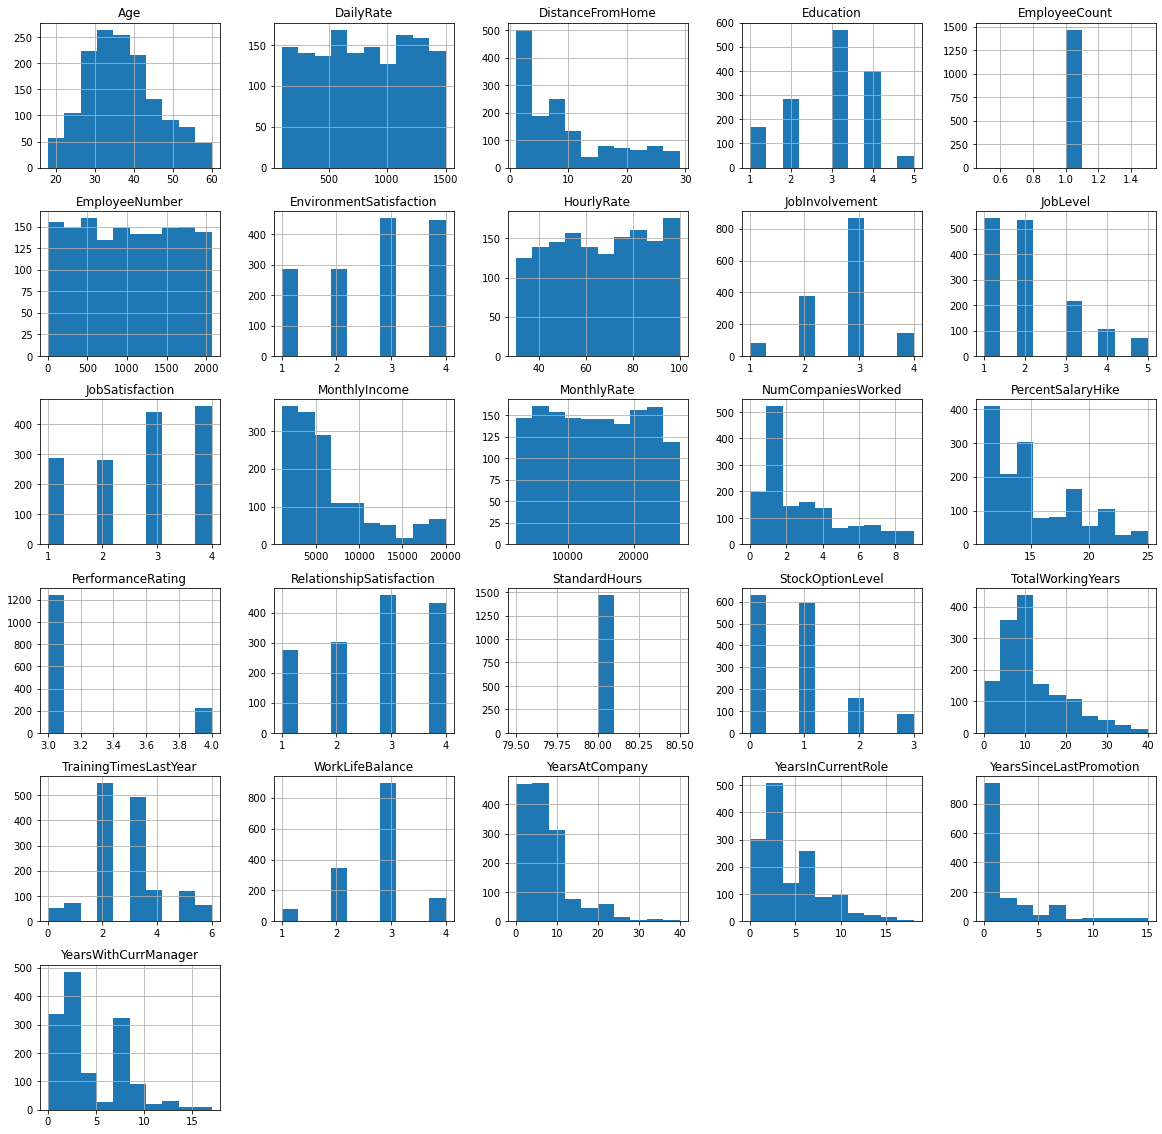

In [12]:
Employee_Data.hist(figsize=(20,20))
plt.show()

* DistanceFromHome: Most of employees live close to company which most distance are below 10km.


* MonthlyIncome: The majority of monthly income of employees are centred at around 5000. Only a few of people get high income over 10000.

    
* NumCompaniesWorked: Most employees only worked for one company.

    
* TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager: These time type data are right skewed which most of people stay in company only for a few years.

    
* DailyRate, HourlyRate, MonthlyRate distributed uniformly which the figure is similar in different intervals.

### Age 

Text(0.5, 1.0, 'Distribution Plot of Age')

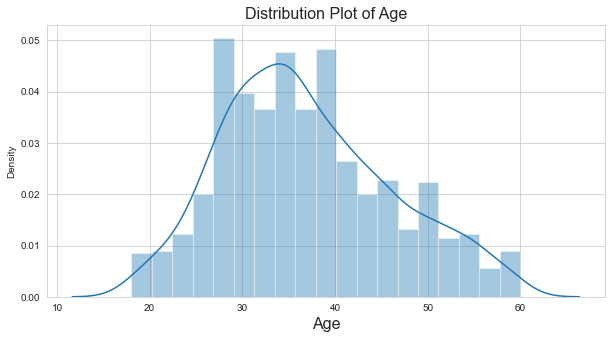

In [13]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.distplot(Employee_Data['Age'])
plt.xlabel('Age', fontsize=16)
plt.title('Distribution Plot of Age', fontsize=16)

* The age distribution of this data set distributed normally which cover from 20 to 60. Most employees are 30 to 40.

Text(0.5, 1.0, 'Distribution Plot of Age with Attrition')

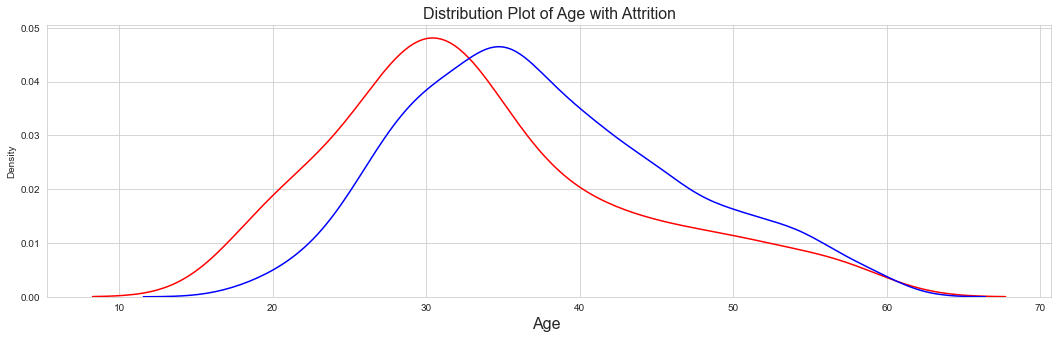

In [14]:
plt.figure(figsize=(18,5))

sns.distplot(Employee_Data['Age'][Employee_Data['Attrition'] == 'Yes'], hist = False, color = 'red')

sns.distplot(Employee_Data['Age'][Employee_Data['Attrition'] == 'No'], hist = False, color = 'blue')

plt.xlabel('Age ', fontsize = 16)
plt.title('Distribution Plot of Age with Attrition', fontsize = 16)

### Gender

Text(0.5, 1.0, 'Plot for Gender')

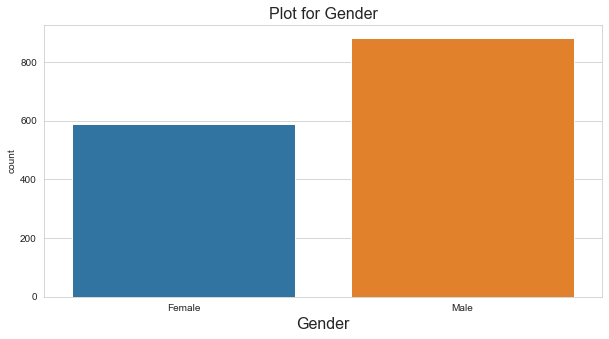

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Gender', data = Employee_Data)
plt.xlabel('Gender', fontsize=16)
plt.title('Plot for Gender', fontsize=16)

### Marital Status

Text(0.5, 1.0, 'Plot for MaritalStatus')

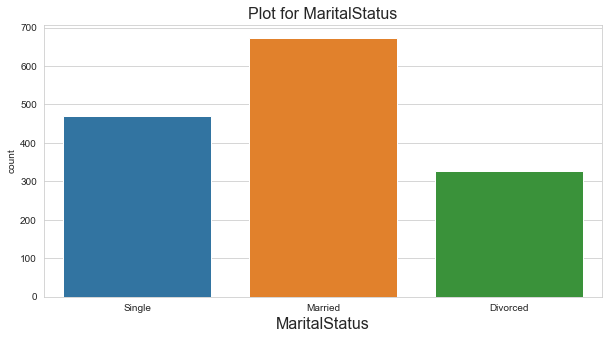

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'MaritalStatus', data = Employee_Data)
plt.xlabel('MaritalStatus', fontsize=16)
plt.title('Plot for MaritalStatus', fontsize=16)

### Job Role

Text(0.5, 1.0, 'Plot for JobRole')

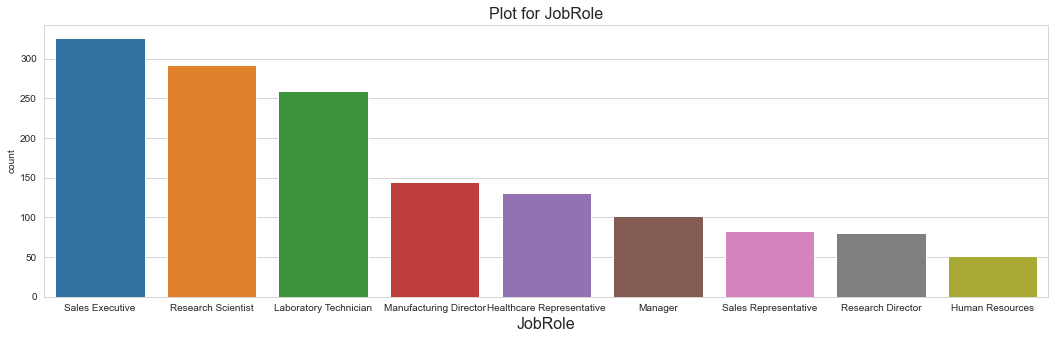

In [17]:
plt.figure(figsize=(18,5))
sns.countplot(x = 'JobRole', data = Employee_Data)
plt.xlabel('JobRole', fontsize=16)
plt.title('Plot for JobRole', fontsize=16)

### Years At Company

Text(0.5, 1.0, 'Distribution Plot of YearsAtCompany with Attrition')

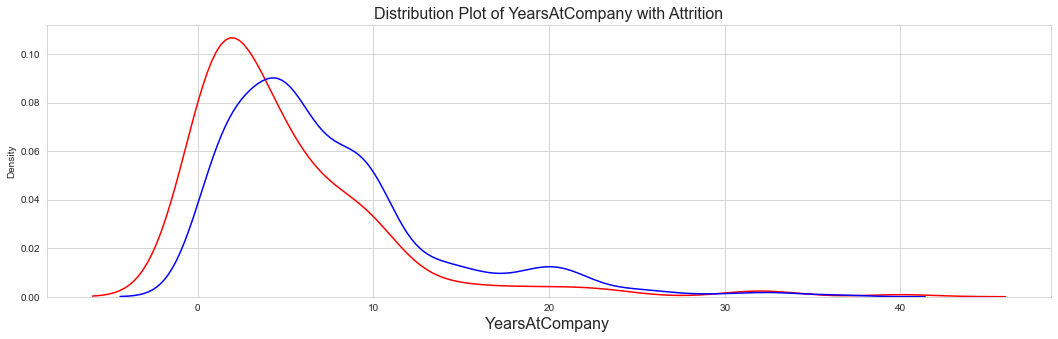

In [18]:
plt.figure(figsize=(18,5))

sns.distplot(Employee_Data['YearsAtCompany'][Employee_Data['Attrition'] == 'Yes'], hist = False, color = 'red')

sns.distplot(Employee_Data['YearsAtCompany'][Employee_Data['Attrition'] == 'No'], hist = False, color = 'blue')

plt.xlabel('YearsAtCompany ', fontsize = 16)
plt.title('Distribution Plot of YearsAtCompany with Attrition', fontsize = 16)

### Department

Text(0.5, 1.0, 'Plot for Department')

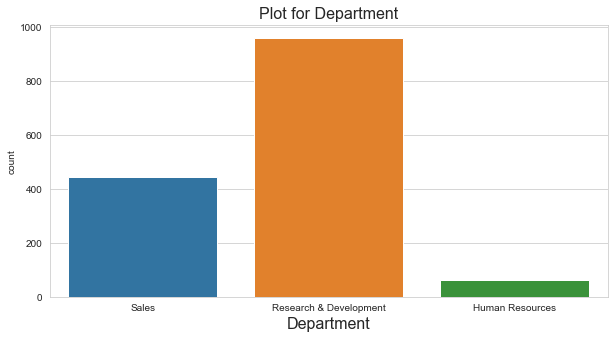

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Department', data = Employee_Data)
plt.xlabel('Department', fontsize=16)
plt.title('Plot for Department', fontsize=16)

Text(0.5, 1.0, 'Plot for Department with Attrition')

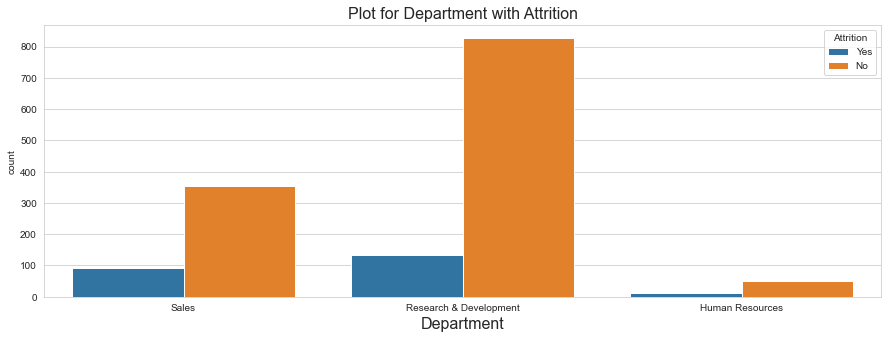

In [20]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Department', hue = 'Attrition', data = Employee_Data)
plt.xlabel('Department', fontsize=16)
plt.title('Plot for Department with Attrition', fontsize=16)

In [21]:
Attrition_Yes = Employee_Data.groupby(Employee_Data['Department'][Employee_Data['Attrition'] == 'Yes']).size().reset_index(name = "Attrition_Yes")
Attrition_No = Employee_Data.groupby(Employee_Data['Department'][Employee_Data['Attrition'] == 'No']).size().reset_index(name = "Attrition_No")

Total = Employee_Data.groupby(Employee_Data['Department']).size().reset_index(name = 'Total')

Department_Table = Attrition_Yes.join(Attrition_No['Attrition_No']).join(Total['Total'])

Department_Table


,Department,Attrition_Yes,Attrition_No,Total
0,Human Resources,12,51,63
1,Research & Development,133,828,961
2,Sales,92,354,446


In [22]:
Department_Table['Attrition_Yes'] = round((Attrition_Yes['Attrition_Yes']/Total['Total'])*100,2)
Department_Table['Attrition_No'] = round((Attrition_No['Attrition_No']/Total['Total'])*100,2)

Department_perc = Department_Table.iloc[:,0:3]
Department_perc = Department_perc.rename(columns={'Attrition_Yes': 'Attrition_Yes(%)', 'Attrition_No': 'Attrition_No(%)'})

Department_perc

,Department,Attrition_Yes(%),Attrition_No(%)
0,Human Resources,19.05,80.95
1,Research & Development,13.84,86.16
2,Sales,20.63,79.37


### Education

Text(0.5, 1.0, 'Plot for Education')

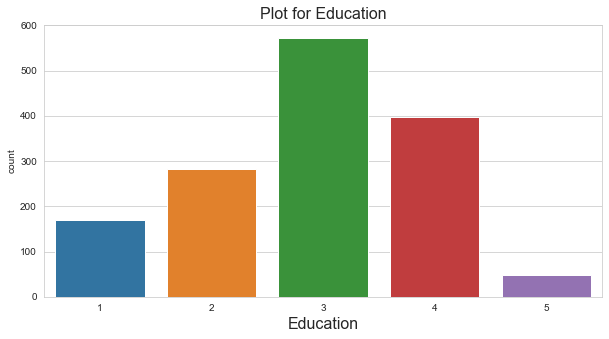

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Education', data = Employee_Data)
plt.xlabel('Education', fontsize=16)
plt.title('Plot for Education', fontsize=16)

Text(0.5, 1.0, 'Plot for Education with Attrition')

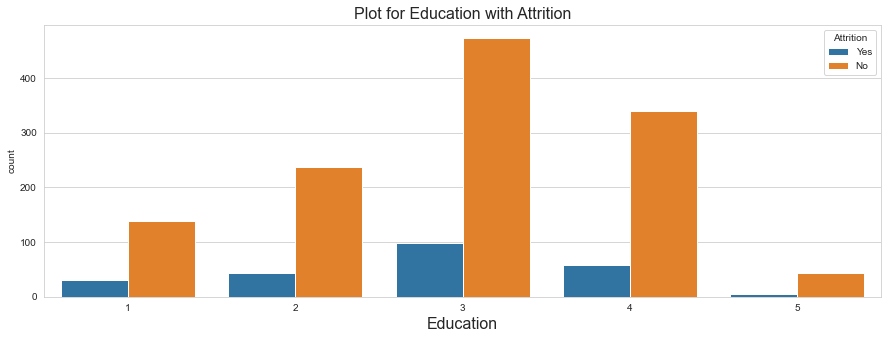

In [24]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Education', hue = 'Attrition',data = Employee_Data)
plt.xlabel('Education', fontsize=16)
plt.title('Plot for Education with Attrition', fontsize=16)

In [25]:
Attrition_Yes = Employee_Data.groupby(Employee_Data['Education'][Employee_Data['Attrition'] == 'Yes']).size().reset_index(name = "Attrition_Yes")
Attrition_No = Employee_Data.groupby(Employee_Data['Education'][Employee_Data['Attrition'] == 'No']).size().reset_index(name = "Attrition_No")

Total = Employee_Data.groupby(Employee_Data['Education']).size().reset_index(name = 'Total')

Education_Table = Attrition_Yes.join(Attrition_No['Attrition_No']).join(Total['Total'])

Education_Table['Education'] = ['Below College' , 'College' , 'Bachelor', 'Master' , 'Doctor']

# 1 = 'Below College' , 2 = 'College' , 3 = 'Bachelor', 4 = 'Master' , 5 = 'Doctor'

Education_Table


,Education,Attrition_Yes,Attrition_No,Total
0,Below College,31,139,170
1,College,44,238,282
2,Bachelor,99,473,572
3,Master,58,340,398
4,Doctor,5,43,48


In [26]:
Education_Table['Attrition_Yes'] = round((Attrition_Yes['Attrition_Yes']/Total['Total'])*100,2)
Education_Table['Attrition_No'] = round((Attrition_No['Attrition_No']/Total['Total'])*100,2)

Education_perc = Education_Table.iloc[:,0:3]
Education_perc = Education_perc.rename(columns={'Attrition_Yes': 'Attrition_Yes(%)', 'Attrition_No': 'Attrition_No(%)'})

Education_perc

,Education,Attrition_Yes(%),Attrition_No(%)
0,Below College,18.24,81.76
1,College,15.60,84.40
2,Bachelor,17.31,82.69
3,Master,14.57,85.43
4,Doctor,10.42,89.58


### Education Field

Text(0.5, 1.0, 'Plot for EducationField')

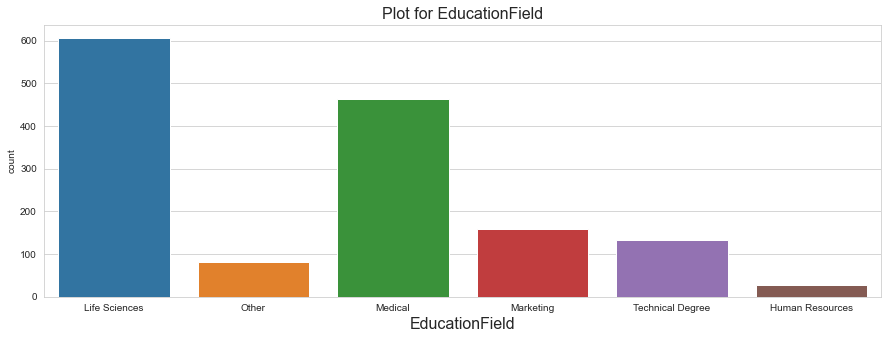

In [27]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'EducationField', data = Employee_Data)
plt.xlabel('EducationField', fontsize=16)
plt.title('Plot for EducationField', fontsize=16)

Text(0.5, 1.0, 'Plot for EducationField with Attrition')

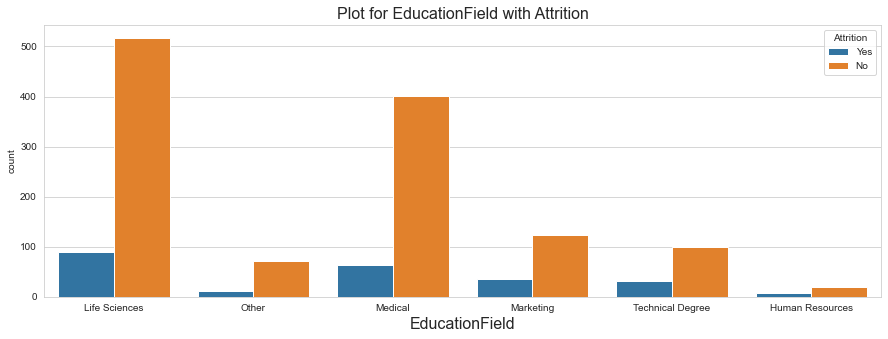

In [28]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'EducationField', hue = 'Attrition', data = Employee_Data)
plt.xlabel('EducationField', fontsize=16)
plt.title('Plot for EducationField with Attrition', fontsize=16)

In [29]:
Attrition_Yes = Employee_Data.groupby(Employee_Data['EducationField'][Employee_Data['Attrition'] == 'Yes']).size().reset_index(name = "Attrition_Yes")
Attrition_No = Employee_Data.groupby(Employee_Data['EducationField'][Employee_Data['Attrition'] == 'No']).size().reset_index(name = "Attrition_No")

Total = Employee_Data.groupby(Employee_Data['EducationField']).size().reset_index(name = 'Total')

EducationField_Table = Attrition_Yes.join(Attrition_No['Attrition_No']).join(Total['Total'])

EducationField_Table

,EducationField,Attrition_Yes,Attrition_No,Total
0,Human Resources,7,20,27
1,Life Sciences,89,517,606
2,Marketing,35,124,159
3,Medical,63,401,464
4,Other,11,71,82
5,Technical Degree,32,100,132


In [30]:
EducationField_Table['Attrition_Yes'] = round((Attrition_Yes['Attrition_Yes']/Total['Total'])*100,2)
EducationField_Table['Attrition_No'] = round((Attrition_No['Attrition_No']/Total['Total'])*100,2)

EducationField_perc = EducationField_Table.iloc[:,0:3]
EducationField_perc = EducationField_perc.rename(columns={'Attrition_Yes': 'Attrition_Yes(%)', 'Attrition_No': 'Attrition_No(%)'})

EducationField_perc

,EducationField,Attrition_Yes(%),Attrition_No(%)
0,Human Resources,25.93,74.07
1,Life Sciences,14.69,85.31
2,Marketing,22.01,77.99
3,Medical,13.58,86.42
4,Other,13.41,86.59
5,Technical Degree,24.24,75.76


### Environment Satisfaction

Text(0.5, 1.0, 'Plot for EnvironmentSatisfaction')

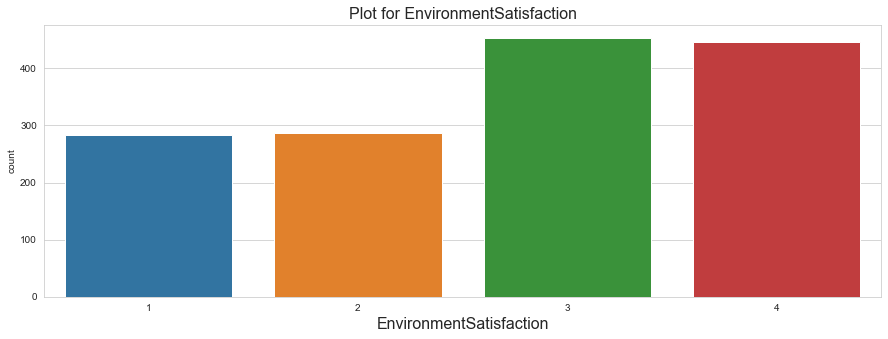

In [31]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'EnvironmentSatisfaction', data = Employee_Data)
plt.xlabel('EnvironmentSatisfaction', fontsize=16)
plt.title('Plot for EnvironmentSatisfaction', fontsize=16)

Text(0.5, 1.0, 'Plot for EnvironmentSatisfaction with Attrition')

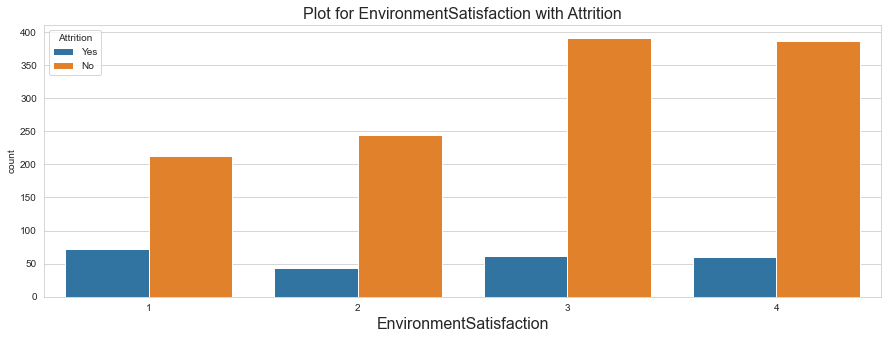

In [32]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'EnvironmentSatisfaction', hue = 'Attrition', data = Employee_Data)
plt.xlabel('EnvironmentSatisfaction', fontsize=16)
plt.title('Plot for EnvironmentSatisfaction with Attrition', fontsize=16)

Text(0.5, 1.0, 'Plot for MonthlyIncome vs DailyRate with Attrition')

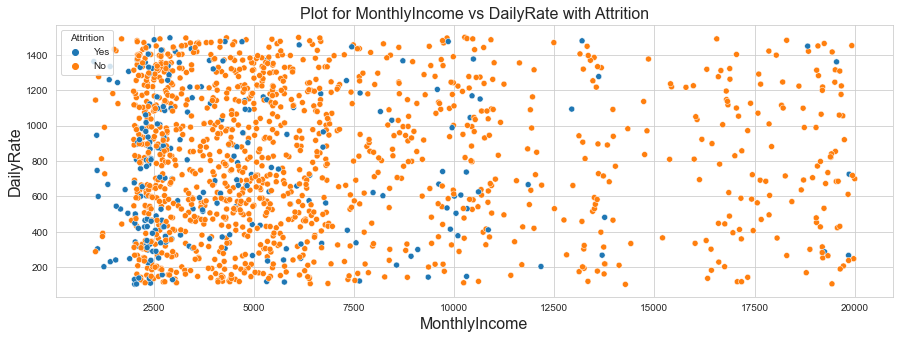

In [33]:
plt.figure(figsize=(15,5))
sns.scatterplot(x = 'MonthlyIncome', y = 'DailyRate', hue = 'Attrition', data = Employee_Data)
plt.xlabel('MonthlyIncome', fontsize=16)
plt.ylabel('DailyRate', fontsize=16)
plt.title('Plot for MonthlyIncome vs DailyRate with Attrition', fontsize=16)

## Correlation matrix

<AxesSubplot:>

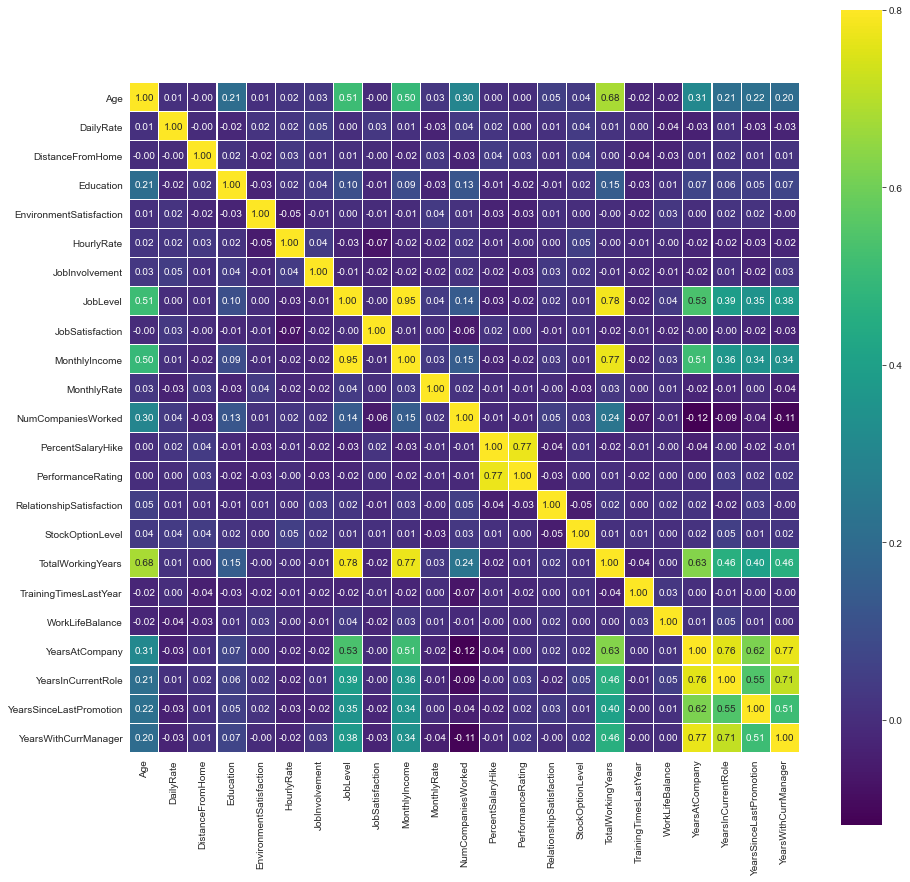

In [34]:
# Heatmap is a useful tool to get a quick understanding of which variables are important

colormap = plt.cm.viridis
cor = Employees_Data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor,vmax=0.8,cmap=colormap,annot=True,fmt='.2f',square=True,annot_kws={'size':10},linecolor='white',linewidths=0.1)

* Time type of features (Years at company, in current role, since last promotion and with current manager) are quite correlated to each other indicated by green zone.


* Besides, totle working year is also correlated to monthly income as we imagined.


* Most of features are not correlated to each other, so we do not have to deal with that. As for time type of features, we will consider that whether to alter them according to the machine learning model.

## Label Encoding

Text(0.5, 1.0, 'Plot for Attrition')

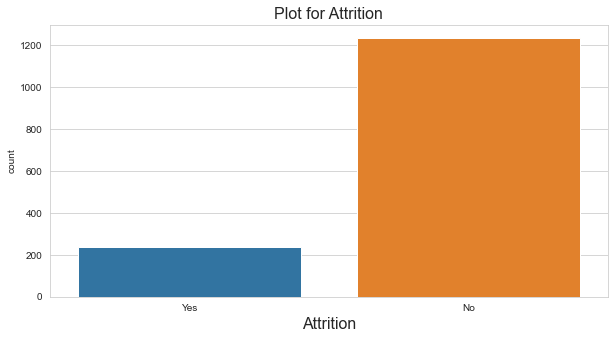

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Attrition', data = Employee_Data)
plt.xlabel('Attrition', fontsize=16)
plt.title('Plot for Attrition', fontsize=16)

In [36]:
# Changing yes = 1 / No = 0

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [37]:
Employees_Data['Attrition'] = labelencoder.fit_transform(Employees_Data['Attrition'])

In [38]:
Employees_Data['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

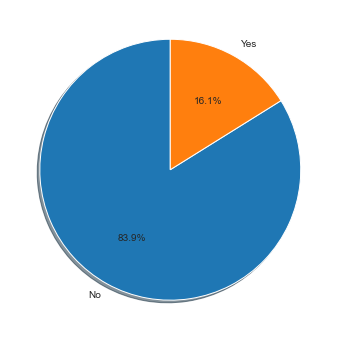

In [39]:
Attrition = ['No', 'Yes'] 
  
data = [1233,237] 

fig = plt.figure(figsize =(15,6)) 
plt.pie(data, labels = Attrition, autopct='%1.1f%%', shadow=True, startangle=90) 
plt.show() 

## Separate the numerical & catagorical columns 

In [40]:
Employees_Data_num = Employees_Data.select_dtypes(include=[np.number]).copy()

Employees_Data_num.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,2,94,3,2,4,...,3,1,0,8,0,1,6,4,0,5
1,49,0,279,8,1,3,61,2,2,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,4,92,2,1,3,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,4,56,3,1,3,...,3,3,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,40,3,1,2,...,3,4,1,6,3,3,2,2,2,2


In [41]:
Employees_Data_char = Employees_Data.select_dtypes(include='object').copy()

Employees_Data_char.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


## Creating Dummy variables 

In [42]:
Employees_Data_dummy = pd.get_dummies(Employees_Data_char)

Employees_Data_dummy.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


## Combining the Data

In [43]:
Employees_Data_combined = pd.concat([Employees_Data_num,Employees_Data_dummy], axis=1)

Employees_Data_combined.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,...,0,0,0,1,0,0,0,1,0,1
1,49,0,279,8,1,3,61,2,2,2,...,0,0,1,0,0,0,1,0,1,0
2,37,1,1373,2,2,4,92,2,1,3,...,0,0,0,0,0,0,0,1,0,1
3,33,0,1392,3,4,4,56,3,1,3,...,0,0,1,0,0,0,1,0,0,1
4,27,0,591,2,1,1,40,3,1,2,...,0,0,0,0,0,0,1,0,1,0


## PreProcessing Data

In [44]:
#Independent Variable = feature variable = Predictor variable

x = Employees_Data_combined.drop(columns=['Attrition'])

# Dependent Variable = Response variable 

y = Employees_Data_combined[['Attrition']]

## Modeling

* Split data into Train & Test

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 100)

In [46]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1102, 51)
(1102, 1)
(368, 51)
(368, 1)


## Decision Tree

In [47]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [48]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [49]:
y_pred = model.predict(x_test)

### Confusion Matrix

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[272  40]
 [ 33  23]]


Text(0.5, 16.0, 'Predicted label')

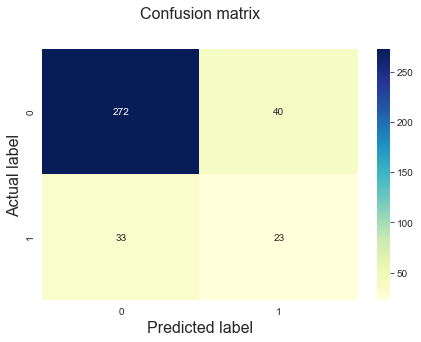

In [51]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1, fontsize = 16)
plt.ylabel('Actual label', fontsize = 16)
plt.xlabel('Predicted label', fontsize = 16)

In [52]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.8016304347826086

In [53]:
Y_pred_test = model.predict(x_test)
Y_pred_train = model.predict(x_train)

print('Accuracy Train:',metrics.accuracy_score(y_train,Y_pred_train))
print('Accuracy Test:',metrics.accuracy_score(y_test,Y_pred_test))

Accuracy Train: 1.0
Accuracy Test: 0.8016304347826086


In [54]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8016304347826086
Precision: 0.36507936507936506
Recall: 0.4107142857142857


## Area under ROC curve

In [55]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test,model.predict_proba(x_test)[:,1])
print('Aera under ROC cure:',roc_auc)

Aera under ROC cure: 0.6412545787545787


## Changing Criterion 

### Entropy with Max depth = 3

In [56]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [57]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [58]:
y_pred = model.predict(x_test)

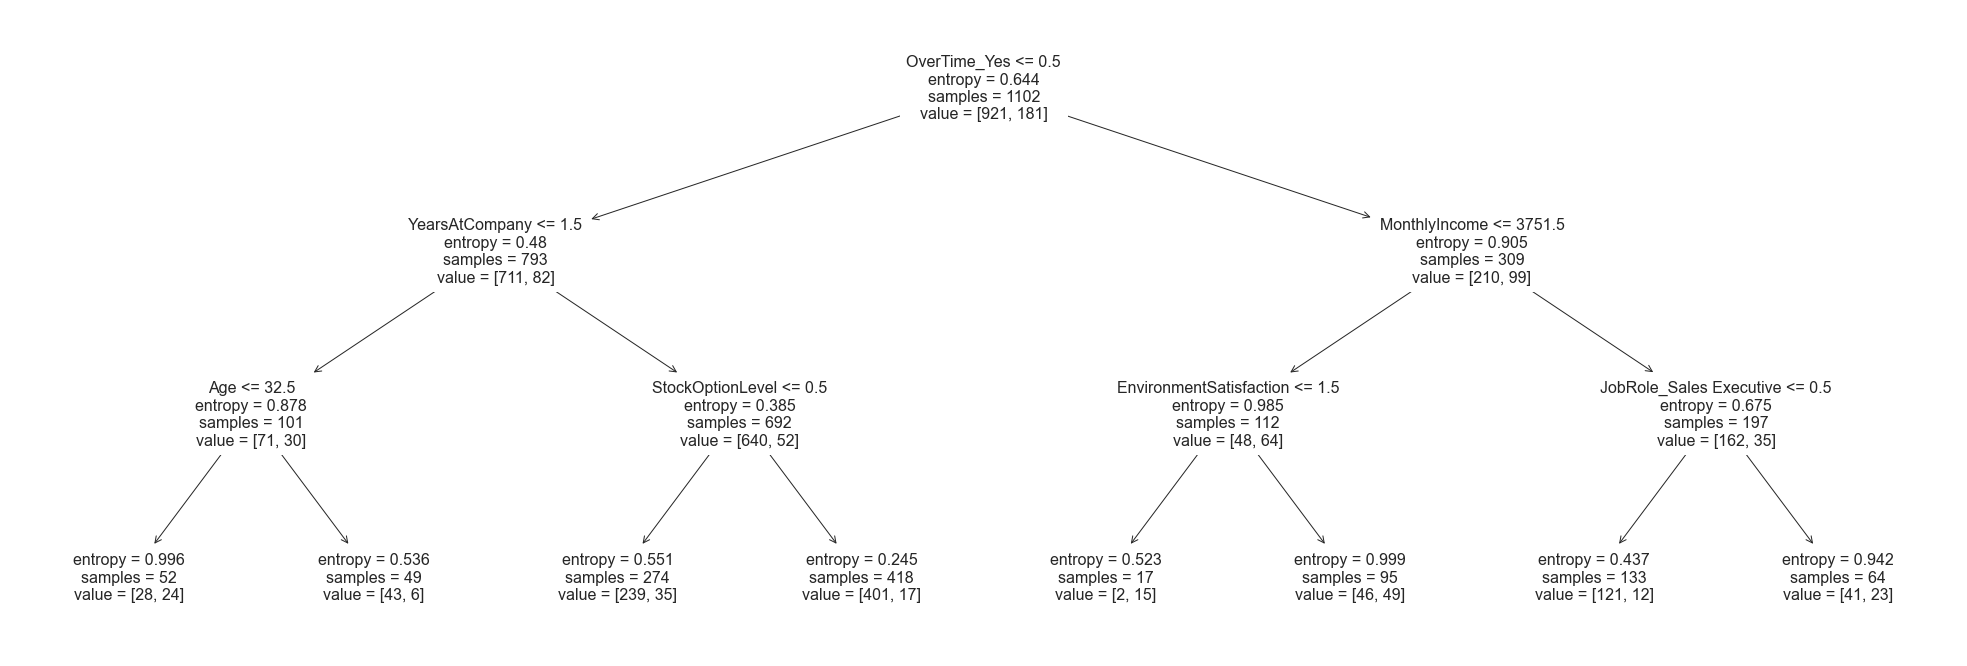

In [59]:
from sklearn import tree
plt.figure(figsize=(35,12))
tree.plot_tree(model,feature_names=x_train.columns.values);

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[295  17]
 [ 42  14]]


In [61]:
Y_pred_test = model.predict(x_test)
Y_pred_train = model.predict(x_train)

print('Accuracy Train:',metrics.accuracy_score(y_train,Y_pred_train))
print('Accuracy Test:',metrics.accuracy_score(y_test,Y_pred_test))

Accuracy Train: 0.8502722323049002
Accuracy Test: 0.8396739130434783


In [62]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.8396739130434783

### Gini with Max depth = 3

In [63]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='gini', max_depth = 3)

In [64]:
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.8614130434782609

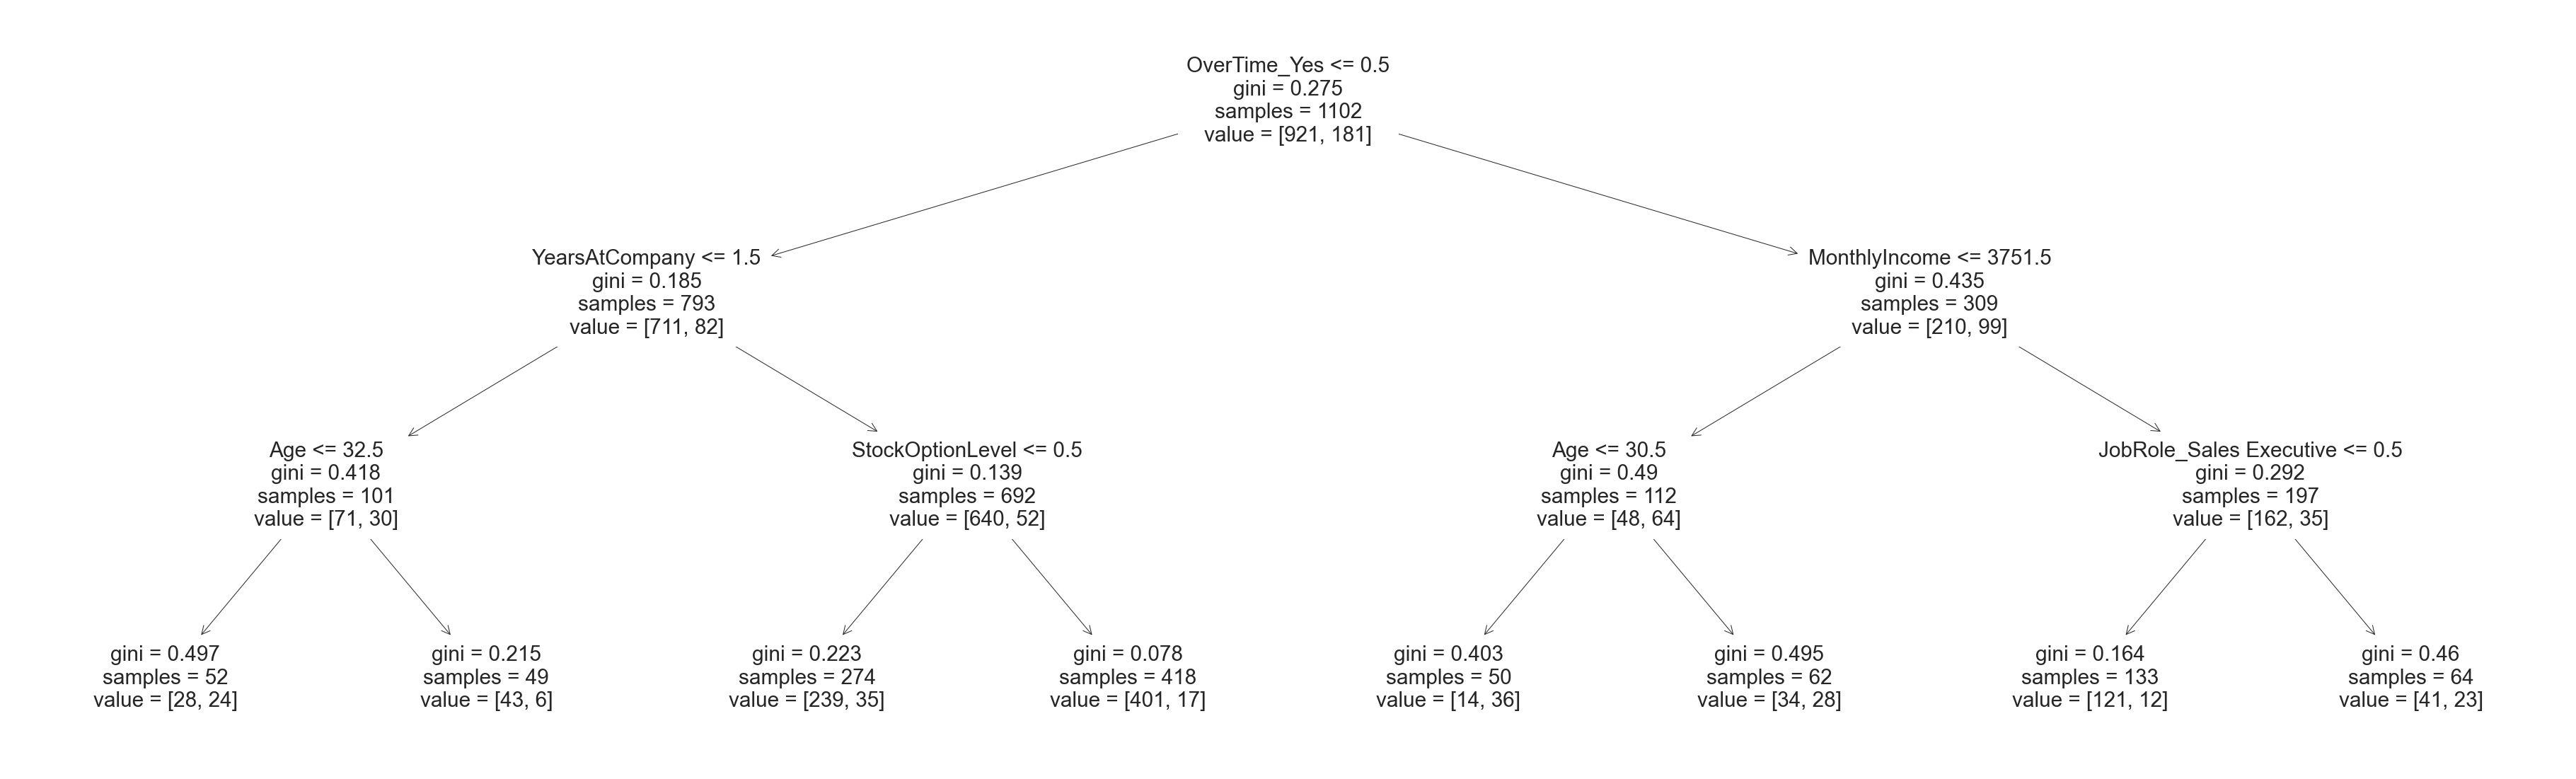

In [65]:
from sklearn import tree
plt.figure(figsize=(65,20))
tree.plot_tree(model,feature_names=x_train.columns.values);

## Decision Tree Implementation

In [66]:
from sklearn import tree
dt_model = tree.DecisionTreeClassifier(criterion='gini',class_weight='balanced', max_depth=15,random_state=15)

dt_model.fit(x_train, y_train)

Y_pred_test = dt_model.predict(x_test)
Y_pred_train = dt_model.predict(x_train)

print('Accuracy Train:',metrics.accuracy_score(y_train,Y_pred_train))
print('Accuracy Test:',metrics.accuracy_score(y_test,Y_pred_test))

Accuracy Train: 0.9927404718693285
Accuracy Test: 0.8070652173913043


In [67]:
metrics.accuracy_score(y_test, Y_pred_test) 
tree1_auc = roc_auc_score(y_test, Y_pred_test)
print("Decision Tree AUC:", tree1_auc)

Decision Tree AUC: 0.6078296703296704


In [68]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
DT = dt_model.fit(x_train, y_train)

print ("\n\n ---Decision Tree Model---")
roc_auc = roc_auc_score(y_test, dt_model.predict(x_test))
print ("Random Forest AUC = %2.2f" % roc_auc)
print(classification_report(y_test, dt_model.predict(x_test)))



 ---Decision Tree Model---
Random Forest AUC = 0.61
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       312
           1       0.35      0.32      0.34        56

    accuracy                           0.81       368
   macro avg       0.62      0.61      0.61       368
weighted avg       0.80      0.81      0.80       368



## RandomForest Implementation

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', class_weight = 'balanced', 
                                           max_leaf_nodes = 20 ,random_state = 15)


rf_model.fit(x_train, y_train)

Y_pred_test = rf_model.predict(x_test)
Y_pred_train = rf_model.predict(x_train)

print('Accuracy Train:',metrics.accuracy_score(y_train,Y_pred_train))
print('Accuracy Test:',metrics.accuracy_score(y_test,Y_pred_test))

Accuracy Train: 0.8802177858439202
Accuracy Test: 0.7880434782608695


In [70]:
from sklearn.metrics import roc_auc_score
rf_roc_auc = roc_auc_score(y_test,rf_model.predict_proba(x_test)[:,1])
print('Aera under ROC cure:',rf_roc_auc)

Aera under ROC cure: 0.719150641025641


In [71]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
rf = rf_model.fit(x_train, y_train)

print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf_model.predict(x_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf_model.predict(x_test)))



 ---Random Forest Model---
Random Forest AUC = 0.68
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       312
           1       0.36      0.52      0.43        56

    accuracy                           0.79       368
   macro avg       0.63      0.68      0.65       368
weighted avg       0.82      0.79      0.80       368



In [72]:
from sklearn.metrics import roc_curve
rf_FPR,rf_TPR,rf_Thresholds = roc_curve(y_test,rf_model.predict_proba(x_test)[:,1])

fpr_series = pd.Series(rf_FPR)
tpr_series = pd.Series(rf_TPR)
thresholds_series = pd.Series(rf_Thresholds)

df = pd.concat([fpr_series,tpr_series,thresholds_series],axis=1,keys=['FPR','TPR','THRESHOLD'])
df.sort_values(by='TPR',ascending=False)

,FPR,TPR,THRESHOLD
87,1.000000,1.000000,0.114264
86,0.942308,1.000000,0.159565
85,0.942308,0.982143,0.160786
84,0.900641,0.982143,0.170256
83,0.900641,0.964286,0.171732
...,...,...,...
5,0.006410,0.107143,0.756521
2,0.000000,0.089286,0.793367
3,0.003205,0.089286,0.787805
1,0.000000,0.017857,0.862704


## RandomSearchCV

In [73]:
model_params = {'n_estimators' :[140,145,150,155,160], 'max_leaf_nodes':range(10,20),'criterion':['gini','entropy']}

In [74]:
rf_model = RandomForestClassifier(random_state = 15)

In [75]:
from sklearn.model_selection import RandomizedSearchCV
random_search_object = RandomizedSearchCV(rf_model, model_params,n_iter = 10, cv = 3,random_state = 15)

random_search_best_model = random_search_object.fit(x_train,y_train)

In [76]:
Y_pred_test = random_search_best_model.predict(x_test)
Y_pred_train = random_search_best_model.predict(x_train)

print('Accuracy Train:',metrics.accuracy_score(y_train,Y_pred_train))
print('Accuracy Test:',metrics.accuracy_score(y_test,Y_pred_test))

Accuracy Train: 0.8802177858439202
Accuracy Test: 0.8614130434782609


In [77]:
from sklearn.metrics import roc_auc_score
rscv_roc_auc = roc_auc_score(y_test,random_search_object.predict_proba(x_test)[:,1])
print('Aera under ROC cure:',rscv_roc_auc)

Aera under ROC cure: 0.730139652014652


In [78]:
random_search_best_model.best_params_

{'n_estimators': 145, 'max_leaf_nodes': 19, 'criterion': 'gini'}

In [79]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
Rs = random_search_best_model.fit(x_train, y_train)

print ("\n\n ---RandomSearchCV Model---")
Rs_roc_auc = roc_auc_score(y_test, random_search_best_model.predict(x_test))
print ("Random Forest AUC = %2.2f" % Rs_roc_auc)
print(classification_report(y_test, random_search_best_model.predict(x_test)))



 ---RandomSearchCV Model---
Random Forest AUC = 0.56
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       312
           1       0.78      0.12      0.22        56

    accuracy                           0.86       368
   macro avg       0.82      0.56      0.57       368
weighted avg       0.85      0.86      0.82       368



## Grid Search

In [80]:
from sklearn.model_selection import GridSearchCV
grid_search_object = GridSearchCV(rf_model, model_params, cv = 3)

In [81]:
grid_search_best_model = grid_search_object.fit(x_train,y_train)

In [82]:
grid_search_best_model

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=15),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': range(10, 20),
                         'n_estimators': [140, 145, 150, 155, 160]})

In [83]:
Y_pred_test = grid_search_best_model.predict(x_test)
Y_pred_train = grid_search_best_model.predict(x_train)

print('Accuracy Train:',metrics.accuracy_score(y_train,Y_pred_train))
print('Accuracy Test:',metrics.accuracy_score(y_test,Y_pred_test))

Accuracy Train: 0.8802177858439202
Accuracy Test: 0.8614130434782609


In [84]:
from sklearn.metrics import roc_auc_score
gscv_roc_auc = roc_auc_score(y_test,grid_search_best_model.predict_proba(x_test)[:,1])
print('Aera under ROC cure:',gscv_roc_auc)

Aera under ROC cure: 0.7331158424908425


In [85]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
rf = random_search_object.fit(x_train, y_train)

print ("\n\n ---Grid Search Model---")
rf_roc_auc = roc_auc_score(y_test, random_search_object.predict(x_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, random_search_object.predict(x_test)))



 ---Grid Search Model---
Random Forest AUC = 0.56
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       312
           1       0.78      0.12      0.22        56

    accuracy                           0.86       368
   macro avg       0.82      0.56      0.57       368
weighted avg       0.85      0.86      0.82       368



In [92]:
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=15)

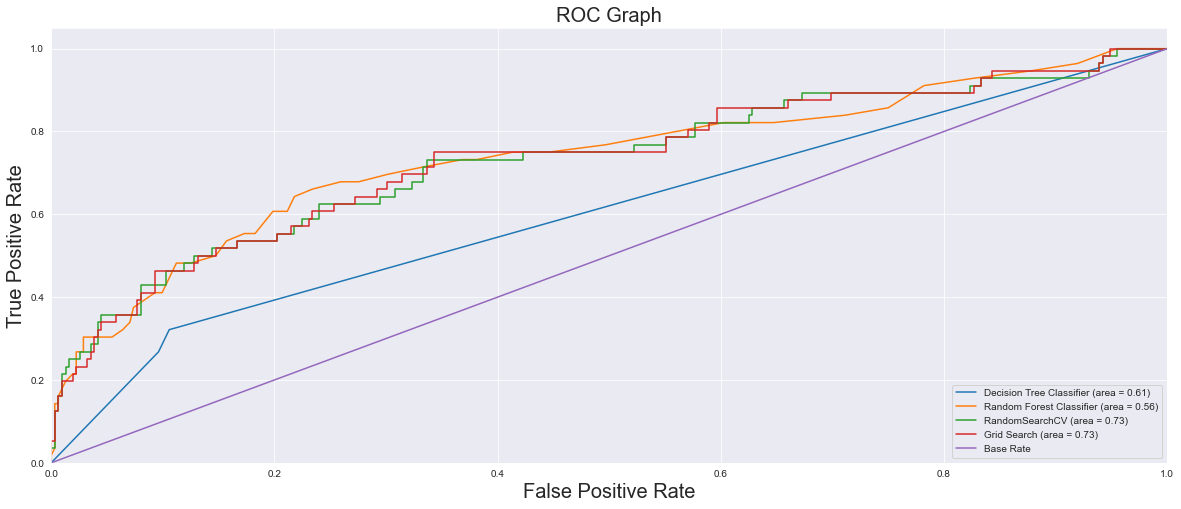

In [93]:
# Create ROC Graph
from sklearn.metrics import roc_curve

df = pd.concat([fpr_series,tpr_series,thresholds_series],axis=1,keys=['FPR','TPR','THRESHOLD'])
dt_FPR,dt_TPR,dt_Thresholds = roc_curve(y_test, dt_model.predict_proba(x_test)[:,1])
rf_FPR,rf_TPR,rf_Thresholds = roc_curve(y_test, rf_model.predict_proba(x_test)[:,1])
Rs_FPR,Rs_TPR,Rs_Thresholds = roc_curve(y_test, random_search_best_model.predict_proba(x_test)[:,1])
Gs_FPR,Gs_TPR,Gs_Thresholds = roc_curve(y_test, grid_search_best_model.predict_proba(x_test)[:,1])

sns.set_style("darkgrid")
plt.figure(figsize=(20,8))

# Plot Decision Tree ROC
plt.plot(dt_FPR,dt_TPR, label='Decision Tree Classifier (area = %0.2f)' % roc_auc)

# Plot Random Forest ROC
plt.plot(rf_FPR,rf_TPR, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(Rs_FPR,Rs_TPR, label='RandomSearchCV (area = %0.2f)' % rscv_roc_auc)

# Plot Grid Search ROC
plt.plot(Gs_FPR,Gs_TPR, label='Grid Search (area = %0.2f)' % gscv_roc_auc)


# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('ROC Graph', fontsize = 20)
plt.legend(loc="lower right")
plt.show()

In [94]:
confusion_matrix(y_test, dt_model.predict(x_test))

array([[279,  33],
       [ 38,  18]], dtype=int64)

In [95]:
confusion_matrix(y_test, rf_model.predict(x_test))

array([[309,   3],
       [ 46,  10]], dtype=int64)

In [96]:
confusion_matrix(y_test, random_search_best_model.predict(x_test))

array([[310,   2],
       [ 49,   7]], dtype=int64)

In [97]:
confusion_matrix(y_test, grid_search_best_model.predict(x_test))

array([[310,   2],
       [ 49,   7]], dtype=int64)

In [98]:
# Get Feature Importances
feature_importances = pd.DataFrame(rf_model.feature_importances_, index = x_train.columns, 
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances

,index,importance
0,MonthlyIncome,0.073828
1,Age,0.053815
2,DailyRate,0.050718
3,TotalWorkingYears,0.047854
4,MonthlyRate,0.046529
5,YearsAtCompany,0.044050
6,HourlyRate,0.043566
7,DistanceFromHome,0.039726
8,OverTime_Yes,0.037121
9,YearsWithCurrManager,0.033598


Text(0.5, 1.0, 'Feature Importances')

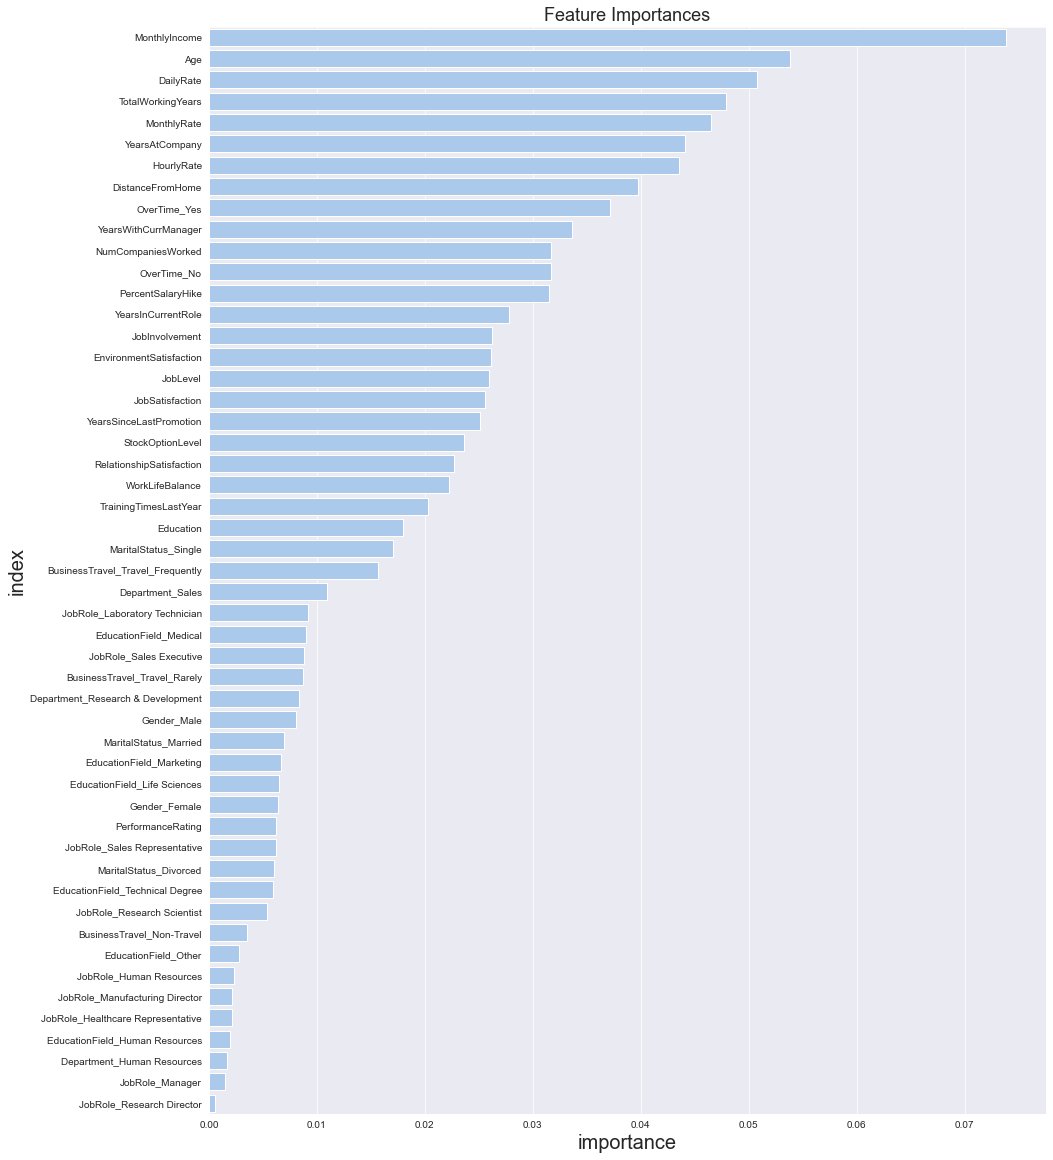

In [99]:
sns.set_style("darkgrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15,20))

# Plot the Feature Importance
sns.set_color_codes("pastel")
sns.barplot(x = "importance", y = 'index', data = feature_importances, label = "Total", color = "b")
plt.xlabel('importance', fontsize = 20)
plt.ylabel('index', fontsize = 20)
plt.title('Feature Importances', fontsize = 18)

## Summary

* The dataset does not feature any missing or erroneous data values, and all features are of the correct data type.
* The strongest positive correlations with the target features are: Performance Rating, Monthly Rate, Num Companies Worked, Distance From Home.
* The strongest negative correlations with the target features are: Total Working Years, Job Level, Years In Current Role, and Monthly Income.
* The dataset is imbalanced with the majoriy of observations describing Currently Active Employees.
* Several features (ie columns) are redundant for our analysis, namely: EmployeeCount, EmployeeNumber, StandardHours, and Over18.

    
## Observations 

* Single employees show the largest proportion of leavers, compared to Married and Divorced counterparts.
* About 10% of leavers left when they reach their 2-year anniversary at the company.
* Loyal employees with higher salaries and more responsbilities show lower proportion of leavers compared to their counterparts.
* People who live further away from their work show higher proportion of leavers compared to their counterparts.
* People who travel frequently show higher proportion of leavers compared to their counterparts.
* People who have to work overtime show higher proportion of leavers compared to their counterparts.
* Employee who work as Sales Representatives show a significant percentage of Leavers in the submitted dataset.
* Employees that have already worked at several companies previously (already "bounced" between workplaces) show higher proportion of leavers compared to their counterparts.

## Concluding Remarks

### Risk Category

As the company generates more data on its employees (on New Joiners and recent Leavers) the algorithm can be re-trained using the additional data and theoritically generate more accurate predictions to identify high-risk employees of leaving based on the probabilistic label assigned to each feature variable (i.e. employee) by the algorithm.

Employees can be assigning a "Risk Category" based on the predicted label such that:

* Low-risk for employees with label < 0.6
* Medium-risk for employees with label between 0.6 and 0.8
* High-risk for employees with label > 0.8

## Strategic Retention Plan

### The stronger indicators of people leaving include:

* Monthly Income: people on higher wages are less likely to leave the company. Hence, efforts should be made to gather information on industry benchmarks in the current local market to determine if the company is providing competitive wages.



* Over Time: people who work overtime are more likelty to leave the company. Hence efforts must be taken to appropriately scope projects upfront with adequate support and manpower so as to reduce the use of overtime.



* YearsWithCurrManager: A large number of leavers leave 6 months after their Current Managers. By using Line Manager details for each employee, one can determine which Manager have experienced the largest numbers of employees resigning over the past year. Several metrics can be used here to determine whether action should be taken with a Line Manager:
    * number of employees under managers showing high turnover rates: this would indicate that the organisation's structure may need to be revisit to improve efficiency
    * number of years the Line Manager has been in a particular position: this may indicate that the employees may need management training or be assigned a mentor (ideally an Executive) in the organisation
    * patterns in the employees who have resigned: this may indicate recurring patterns in employees leaving in which case action may be taken accordingly.



* Age: Employees in relatively young age bracket 25-35 are more likely to leave. Hence, efforts should be made to clearly articulate the long-term vision of the company and young employees fit in that vision, as well as provide incentives in the form of clear paths to promotion for instance.




* DistanceFromHome: Employees who live further from home are more likely to leave the company. Hence, efforts should be made to provide support in the form of company transportation for clusters of employees leaving the same area, or in the form of Transportation Allowance. Initial screening of employees based on their home location is probably not recommended as it would be regarded as a form of discrimination as long as employees make it to work on time every day.




* TotalWorkingYears: The more experienced employees are less likely to leave. Employees who have between 5-8 years of experience should be identified as potentially having a higher-risk of leaving.




* YearsAtCompany: Loyal companies are less likely to leave. Employees who hit their two-year anniversary should be identified as potentially having a higher-risk of leaving.



    A strategic "Retention Plan" should be drawn for each Risk Category group. In addition to the suggested steps for each feature listed above, face-to-face meetings between a HR representative and employees can be initiated for medium- and high-risk employees to discuss work conditions. Also, a meeting with those employee's Line Manager would allow to discuss the work environment within the team and whether steps can be taken to improve it.